C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\3070411552.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diff'] = df_filtered['first_funding_at']-df_filtered['founded_at']
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\3070411552.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diff'] = df_filtered['diff'].apply(lambda x:x.days)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\3070411552.py:20: SettingWithCopyWarning:

market
 Biotechnology           73372948349
 Mobile                  49470108988
 Software                42223476814
 Clean Technology        37619938855
 Health Care             29466081582
 E-Commerce              22408386663
 Enterprise Software     19297188094
 Finance                 17372296213
 Hardware + Software     12812932491
 Advertising             12660664604
 Semiconductors          12341751091
 Health and Wellness     12206533016
 Web Hosting             10721657556
 Technology              10103783218
 Curated Web              9587997713
 Internet                 9369623594
 Games                    9356133283
 Manufacturing            8731242504
 Analytics                7986746184
 Security                 7208829338
Name: funding_total_usd, dtype: int64


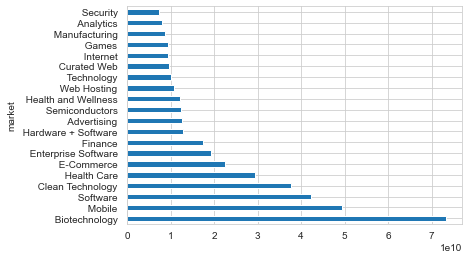

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


test0


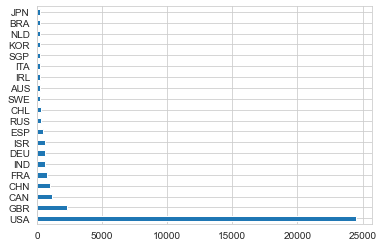

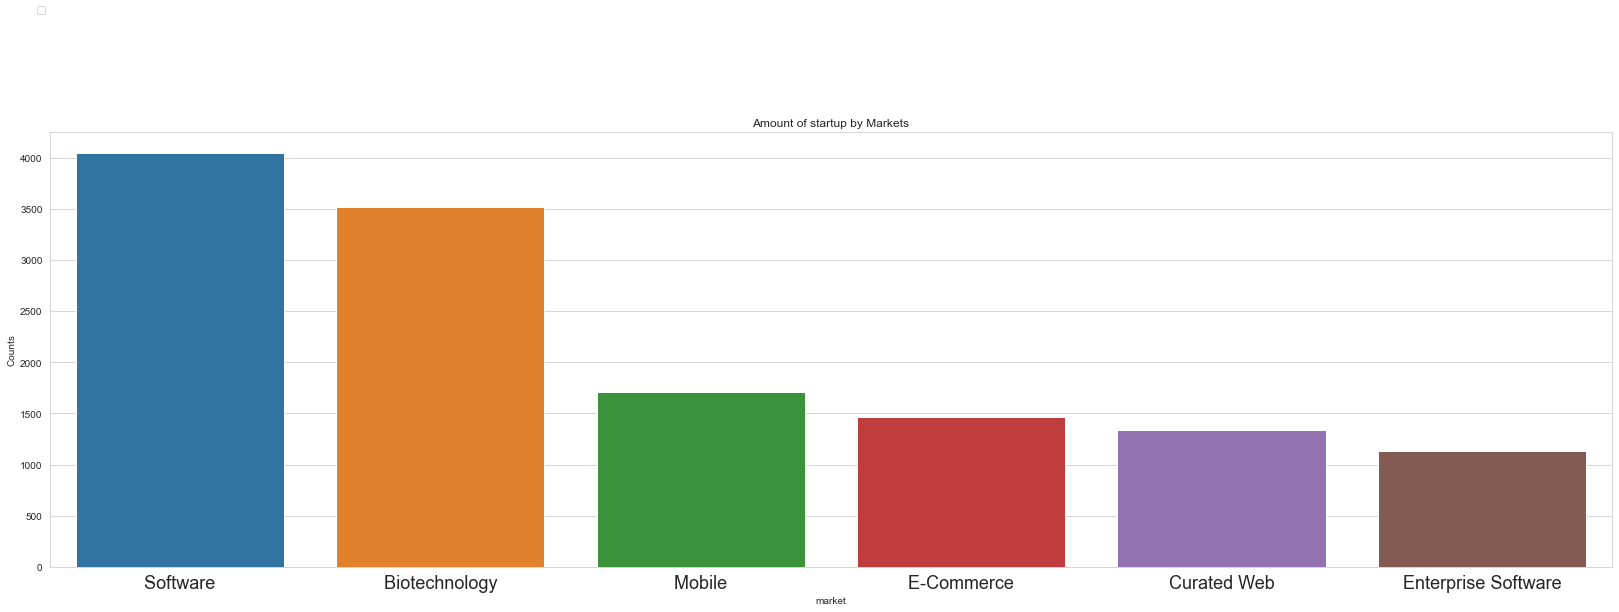

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\natolij\\PycharmProjects\\scientificProject\\data\\investments_VC.csv',encoding='latin1',thousands=',',decimal=',')
df = df.dropna(how="all")
df.columns=df.columns.str.strip()
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: str(x).strip())
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',','')
df.drop(df[df['funding_total_usd']=='-'].index,axis=0,inplace=True)
df.dropna(subset=['funding_total_usd'],inplace=True)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])

df_filtered = df.dropna(subset=['founded_at','first_funding_at'])

df_filtered['diff'] = df_filtered['first_funding_at']-df_filtered['founded_at']
df_filtered['diff'] = df_filtered['diff'].apply(lambda x:x.days)
df_filtered['founded_month'] = df_filtered['founded_month'].apply(lambda x:x.month)
df_filtered['first_funding_month'] = df_filtered['first_funding_at'].apply(lambda x:x.month)

df_filtered['first_funding_month'] = pd.to_numeric(df_filtered['first_funding_month'])

print(df.groupby('market')['funding_total_usd'].sum().nlargest(20))

fundings = df.groupby('market')['funding_total_usd'].sum().nlargest(20)
fundings.plot(kind='barh').get_figure().savefig("C:\work\df_fundings.jpg")
# print(fundings)
# df_fundings.sort_values(by = ['user_ID', 'amount'], ascending=[True,False])
plt.show()
countries = df['country_code'].value_counts()[:20]
countries.plot(kind='barh').get_figure()

# market_count = df['market'].value_counts()[:20].plot(kind='barh')
plt.figure(figsize=(28,8))
plot = sns.countplot(x='market',data=df, order=df['market'].value_counts()[:6].index)
plt.legend(bbox_to_anchor=(0, 1.3))
plot.set_xticklabels(plot.get_xmajorticklabels(), fontsize = 18)

plt.ylabel('Counts')
plt.title('Amount of startup by Markets')
print(f'test{len(df[df["funding_total_usd"] == 0])}')

Total 24477 643
Total with seed 7053 202
Total seed 6830213824.0 96268035.0
Total with vc seed 15643 357


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\897035938.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seed_funded_us = df[df['country_code']=="USA"][df['seed']!=0].shape[0]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\897035938.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seed_funded_ind = df[df['country_code']=="IND"][df['seed']!=0].shape[0]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\897035938.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vc_funded_us = df[df['country_code']=="USA"][df['venture']!=0].shape[0]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\897035938.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vc_funded_ind = df[df['country_code']=="IND"][df['venture']!=0].shape[0]


Total seed 6830213824.0 96268035.0
Total seed 6830213824.0 96268035.0
                             permalink                name  \
0                /organization/waywire            #waywire   
1      /organization/tv-communications  &TV Communications   
4       /organization/r-ranch-and-mine  -R- Ranch and Mine   
5           /organization/club-domains       .Club Domains   
13         /organization/1-800-doctors       1-800-DOCTORS   
...                                ...                 ...   
49426              /organization/zynga               Zynga   
49427           /organization/zyngenia            Zyngenia   
49429         /organization/zyomyx-inc              ZYOMYX   
49431              /organization/zyrra               Zyrra   
49437                  /organization/x               [x+1]   

                   homepage_url  \
0        http://www.waywire.com   
1         http://enjoyandtv.com   
4                           NaN   
5              http://nic.club/   
13       h

<AxesSubplot:xlabel='founded_year'>

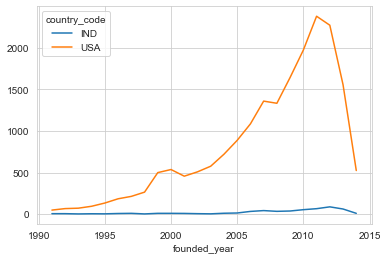

In [8]:
#USA vs INDIA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total_india = df[df['country_code']=="IND"]['name'].shape[0]
total_us = df[df['country_code']=="USA"]['name'].shape[0]
print(f'Total {total_us} {total_india}')
#Total startups with seed funding
seed_funded_us = df[df['country_code']=="USA"][df['seed']!=0].shape[0]
seed_funded_ind = df[df['country_code']=="IND"][df['seed']!=0].shape[0]
print(f'Total with seed {seed_funded_us} {seed_funded_ind}')
#Total seed funding
total_seed_us = df[df['country_code']=="USA"]['seed'].sum()
total_seed_ind = df[df['country_code']=="IND"]['seed'].sum()
print(f'Total seed {total_seed_us} {total_seed_ind}')
#Total startups with VC funding
vc_funded_us = df[df['country_code']=="USA"][df['venture']!=0].shape[0]
vc_funded_ind = df[df['country_code']=="IND"][df['venture']!=0].shape[0]
print(f'Total with vc seed {vc_funded_us} {vc_funded_ind}')
total_seed_us = df[df['country_code']=="USA"]['seed'].sum()
total_seed_ind = df[df['country_code']=="IND"]['seed'].sum()
print(f'Total seed {total_seed_us} {total_seed_ind}')
#Total VC funding
total_vc_us = df[df['country_code']=="USA"]['venture'].sum()
total_vc_ind = df[df['country_code']=="IND"]['venture'].sum()
print(f'Total seed {total_seed_us} {total_seed_ind}')
#most famous market strength
market_us = df[df['country_code']=="USA"]['market'].value_counts()[0]
market_ind = df[df['country_code']=="IND"]['market'].value_counts()[0]
#most famous market name
market_us_name = df[df['country_code']=="USA"]['market'].value_counts().index[0]
market_ind_name = df[df['country_code']=="IND"]['market'].value_counts().index[0]
print(df[df['country_code']=="USA"])
print(df[df['country_code']=="IND"])
df_filt = df[df['country_code'].isin(["USA","IND"])]
df_filt = df_filt[df_filt['founded_year']>1990]
pd.crosstab(df_filt['founded_year'],df_filt['country_code']).plot()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\1317268691.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diff'] = df_filtered['first_funding_at']-df_filtered['founded_at']
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\1317268691.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diff'] = df_filtered['diff'].apply(lambda x:x.days)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14868\1317268691.py:10: SettingWithCopyWarning: 


      status     duration
0   acquired  1523.047893
1     closed   751.973038
2  operating  1485.769469


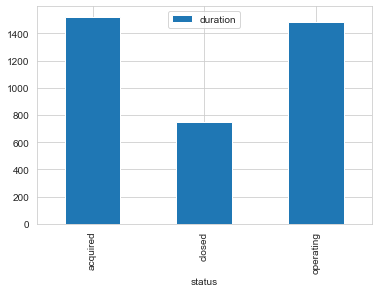

      status         total
0   acquired  2.462436e+07
1     closed  7.372737e+06
2  operating  1.661902e+07


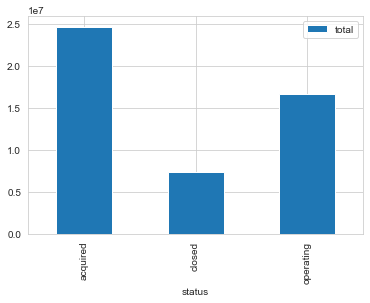

1.0     19567
6.0      1310
3.0      1296
4.0      1224
5.0      1210
9.0      1164
2.0      1141
10.0     1135
7.0      1080
8.0      1071
11.0     1056
12.0      879
Name: founded_month, dtype: int64


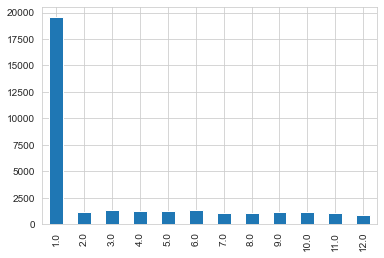

<AxesSubplot:>

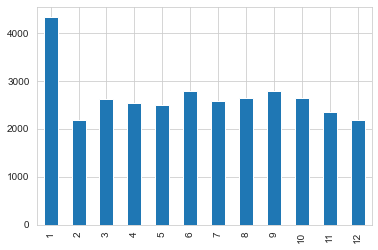

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
df['founded_at'] = pd.to_datetime(df['founded_at'],format='%Y-%m-%d', errors = 'coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'],format='%Y-%m-%d', errors = 'coerce')
df['founded_month'] = pd.to_datetime(df['founded_month'],format='%Y-%m', errors = 'coerce')
df_filtered = df.dropna(subset=['founded_at','first_funding_at'])

df_filtered['diff'] = df_filtered['first_funding_at']-df_filtered['founded_at']
df_filtered['diff'] = df_filtered['diff'].apply(lambda x:x.days)
df_filtered['founded_month'] = df_filtered['founded_month'].apply(lambda x:x.month)
df_filtered['first_funding_month'] = df_filtered['first_funding_at'].apply(lambda x:x.month)

df_filtered['first_funding_month'] = pd.to_numeric(df_filtered['first_funding_month'])

newdf = df_filtered.groupby('status')['diff'].mean().reset_index(name='duration')
newdf.plot.bar(x='status', y='duration')
print(newdf[['status','duration']])
plt.show()

total = df_filtered.groupby('status')['funding_total_usd'].mean().reset_index(name='total')
total.plot.bar(x='status', y='total')
print(total[['status','total']])
plt.show()

df_filtered['founded_month'].value_counts().sort_index().plot(kind='bar')
print(df_filtered['founded_month'].value_counts())
plt.show()
df_filtered['first_funding_month'].value_counts().sort_index().plot(kind='bar')

In [39]:
total_funding = df['funding_total_usd'].sum()
startups_count = 0
funding_sum = 0
iterable_df = df.sort_values(by=['funding_total_usd'],ascending=False)
startups = []
while funding_sum <= total_funding*0.8 and iterable_df.shape[0]>0:
    funding_sum += iterable_df.iloc[startups_count]['funding_total_usd']
    startups.append(f'{iterable_df.iloc[startups_count]["name"]} {iterable_df.iloc[startups_count]["funding_total_usd"]}')
    startups_count += 1
print(f'{total_funding} {startups_count} {funding_sum}')
# print(startups)'Verizon Communications 30079503000', 'Sberbank 5800000000'

print(f'{round(startups_count/iterable_df.shape[0]*100,1)}% startups get {round(funding_sum/total_funding*100,1)}% investitions')

650933703144 5500 520750979232
13.4% startups get 80.0% investitions


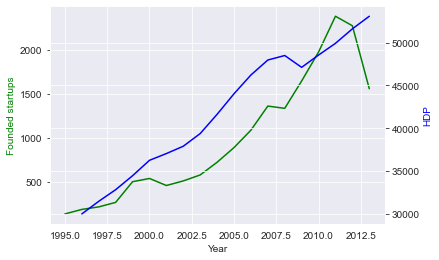

           year     count       hdp
year   1.000000  0.935034  0.988687
count  0.935034  1.000000  0.919321
hdp    0.988687  0.919321  1.000000
funding_total_usd       1.000000
funding_rounds          0.097946
founded_year           -0.062048
seed                   -0.004485
venture                 0.181725
equity_crowdfunding    -0.002046
undisclosed             0.008096
convertible_note        0.010013
debt_financing          0.929618
angel                   0.000243
grant                   0.033015
private_equity          0.206309
post_ipo_equity         0.227298
post_ipo_debt           0.209272
secondary_market        0.037635
product_crowdfunding    0.002979
round_A                 0.049778
round_B                 0.093955
round_C                 0.126205
round_D                 0.113979
round_E                 0.088278
round_F                 0.073920
round_G                 0.043329
round_H                 0.015159
Name: funding_total_usd, dtype: float64


In [6]:
import matplotlib.pyplot as plt
df = df[df['country_code']=='USA']
df = df[df['founded_year']!=2014]
count = df['founded_year'].value_counts().sort_index().reset_index()[-19:].reset_index().rename(columns={"index":"year","founded_year":"count"})
count.drop(["level_0"],axis=1,inplace=True)

hdp = {
    "hdp":[29958,31433,32794,34430,36236,37026,37886,39369,41622,44031,46228,47982,48510,47124,48565,49937,51633,53110]
}

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(count['year'],count['count'],'g-')
ax2.plot([*range(1996,2014,)],hdp['hdp'],'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Founded startups', color='g')
ax2.set_ylabel('HDP', color='b')

plt.show()

print(count.join(pd.DataFrame(hdp)).corr(method='pearson'))
print(df.corr(method='pearson')['funding_total_usd'])